In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import bokeh as bk

In [2]:
import wordcloud

ImportError: No module named PIL

# Read the reviews dataset

In [ ]:
import pandas as pd
import json
import datetime as dt

In [ ]:
from nltk.corpus import stopwords
#stopwords.words("english")

In [ ]:
import nltk
nltk.download("stopwords")

# Clean up the text

In [ ]:
import re
from nltk.corpus import stopwords
def clean_text(text_list):
    clean_text_list = []
    for text in text_list:
        text = re.sub("[^A-Z,a-z]"," ",text)
        #print text
        words = re.split(",|;| |\s+",text)
        stop_words = set(stopwords.words("english"))
        clean_text_list = clean_text_list + [' '.join([word for word in words if word and  not (word in stop_words)])]
    return clean_text_list
    #print words

# Make bag of words features

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
def words_to_bow(words):
    vectorizer = CountVectorizer(analyzer = "word",\
                                tokenizer = None,\
                                preprocessor = None,\
                                stop_words = None,\
                                max_features = 5000)
    features = vectorizer.fit_transform(words)
    feature_names = vectorizer.get_feature_names()
    return (features,feature_names)
    

In [ ]:
text = ["In the IMDB data, we have a very large number of reviews, which will give us a large vocabulary. To limit the size of the feature vectors, we should choose some maximum vocabulary size. Below, we use the 5000 most frequent words (remembering that stop words have already been removed)."]

In [ ]:
text= clean_text(text)
print text

In [ ]:
bow,feature_names = words_to_bow(text)
print bow,feature_names

In [30]:
a = {}
if not a:
    print 1

1


In [1]:
import datetime as dt
import json
text_list = []
fh_in = open("./data/amazon/electronics.json")
fh_out = open("./data/reviews_bow","a")

start = dt.datetime.now()
data = {}

for i,line in enumerate(fh_in):
    #print i, line
    
    line_dict = json.loads(line)
    
    if not data:
        for col in line_dict.keys():
            data[col] = []
    for col in line_dict.keys():
        data[col].append(line_dict.get(col,"NaN"))
    
    if i % 1e5 == 0:
        time_now = dt.datetime.now()
        print "read %d lines in %s" %(i,time_now-start)
        #break
    
    
fh_in.close()
end = dt.datetime.now()
print "read in", end-start
#data.head(6)

read 0 lines in 0:00:00.002063
read 100000 lines in 0:00:03.688717
read 200000 lines in 0:00:07.439740
read 300000 lines in 0:00:11.193541
read 400000 lines in 0:00:15.186621
read 500000 lines in 0:00:19.074397
read 600000 lines in 0:00:23.250262
read 700000 lines in 0:00:27.554241
read 800000 lines in 0:00:31.908981
read 900000 lines in 0:00:35.564478
read 1000000 lines in 0:00:40.147101
read 1100000 lines in 0:00:43.817447
read 1200000 lines in 0:00:47.439288
read 1300000 lines in 0:00:52.010365
read 1400000 lines in 0:00:55.973021
read 1500000 lines in 0:00:59.571621
read 1600000 lines in 0:01:04.740236
read in 0:01:08.241271


In [2]:
for col in line_dict.keys():
    print col, len(data[col])
data.pop("reviewerName", None)

reviewerID 1689188
asin 1689188
reviewerName 1664458
helpful 1689188
reviewText 1689188
overall 1689188
summary 1689188
unixReviewTime 1689188
reviewTime 1689188


[u'amazdnu',
 u'Amazon Customer',
 u'C. A. Freeman',
 u'Dave M. Shaw "mack dave"',
 u'Wayne Smith',
 u'Billy G. Noland "Bill Noland"',
 u'Christian',
 u'D. L. Brown "A Knower Of Good Things"',
 u'Mark Dietter',
 u'Matenai',
 u'AllyMG',
 u'Amazon Customer',
 u'Gena',
 u'Jake',
 u'J. Clement',
 u'John',
 u'Nicodimus',
 u'T. Vaughan',
 u'2Cents!',
 u'AGW',
 u'ahoffoss',
 u'Alberto Dieguez "premiere purchaser of random...',
 u'Allen Coberly',
 u'Amazon Customer',
 u'Amazon Customer',
 u'Amazon Customer "jkhinch"',
 u'Amazon Customer "steve-mc2"',
 u'anthony smith',
 u'A. Ramos',
 u'arl6969 "arl6969"',
 u'average customer',
 u'Beakeagles',
 u'Benjamin Belanger "v dbl u"',
 u'B. Kilpatrick',
 u'B. Onat',
 u'bonbon',
 u'bone',
 u'Boyd',
 u'Bradley Pool',
 u'Branon Young',
 u'Brian M. Kaplan "Brian M. Kaplan"',
 u'Busy Momma',
 u'C. Aaland',
 u'cajunjake',
 u'cameron',
 u'Captain "Captain America"',
 u'Carolyn D "Carolyn D"',
 u'Castle',
 u'Charlie Troutman "Charlie"',
 u'chicago mom',
 u'chit

In [3]:
import pandas as pd
pd_data = pd.DataFrame.from_dict(data)

In [4]:
pd_data.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,summary,unixReviewTime
0,0528881469,"[0, 0]",5.0,We got this GPS for my husband who is an (OTR)...,"06 2, 2013",AO94DHGC771SJ,Gotta have GPS!,1370131200
1,0528881469,"[12, 15]",1.0,"I'm a professional OTR truck driver, and I bou...","11 25, 2010",AMO214LNFCEI4,Very Disappointed,1290643200
2,0528881469,"[43, 45]",3.0,"Well, what can I say. I've had this unit in m...","09 9, 2010",A3N7T0DY83Y4IG,1st impression,1283990400
3,0528881469,"[9, 10]",2.0,"Not going to write a long review, even thought...","11 24, 2010",A1H8PY3QHMQQA0,"Great grafics, POOR GPS",1290556800
4,0528881469,"[0, 0]",1.0,I've had mine for a year and here's what we go...,"09 29, 2011",A24EV6RXELQZ63,"Major issues, only excuses for support",1317254400


In [10]:
from scripts import word_pre_process

In [11]:
start = dt.datetime.now()
#pd_data["reviewText"][:10000].apply(word_pre_process.clean_text)
pd_data["review_clean"] = pd_data["reviewText"].apply(word_pre_process.clean_text)
end = dt.datetime.now()
print "it took %s to clean text" %(end-start)

it took 0:10:41.515715 to clean text


In [43]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

start = dt.datetime.now()
a = TfidfVectorizer(max_features=5000)
b = a.fit_transform(pd_data["review_clean"])
#pd_data["review_clean"] = pd_data["reviewText"].apply(word_pre_process.clean_text)
end = dt.datetime.now()
print "it took %s to generate tfidf scores" %(end-start)

it took 0:03:11.771674 to generate tfidf scores


In [60]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.linear_model import Ridge as RR
from sklearn.ensemble import AdaBoostRegressor as ABR
model_rf = RFR(max_depth = 10, n_estimators = 10, verbose = True)
model_ridge = RR(alpha = 0.01)
model_ada = ABR()

In [63]:
model_ada.fit(b, pd_data["overall"])

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None)

In [64]:
model_ada.predict(b[:10]),pd_data["overall"][:10]

(array([ 4.27888345,  3.45234321,  3.54793544,  3.46352041,  3.54793544,
         3.9676491 ,  3.9676491 ,  3.9676491 ,  3.46352041,  3.62441887]),
 0    5.0
 1    1.0
 2    3.0
 3    2.0
 4    1.0
 5    5.0
 6    2.0
 7    5.0
 8    4.0
 9    5.0
 Name: overall, dtype: float64)

In [7]:
%load_ext autoreload
%autoreload 2

In [ ]:
model_rf.predict(b[:10])

In [ ]:
pd_data["overall"][:10]

In [57]:
from sklearn.grid_search import GridSearchCV as GSCV
model_rr = GSCV(model_ridge, param_grid = {"alpha":[0,0.01,0.1,1]})

In [58]:
model_rr.fit(b,pd_data["overall"])

GridSearchCV(cv=None, error_score='raise',
       estimator=Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': [0, 0.01, 0.1, 1]}, pre_dispatch='2*n_jobs',
       refit=True, scoring=None, verbose=0)

In [59]:
model_rr.predict(b[:10]),pd_data["overall"][:10]

(array([ 3.65757641,  3.11027762,  2.80167204,  3.59504421,  3.53859272,
         4.83065963,  3.33454048,  4.43629298,  4.93880008,  4.31250737]),
 0    5.0
 1    1.0
 2    3.0
 3    2.0
 4    1.0
 5    5.0
 6    2.0
 7    5.0
 8    4.0
 9    5.0
 Name: overall, dtype: float64)

# Read the json file and save it to SQLITE DATABASE

In [ ]:
import datetime as dt
start = dt.datetime.now()
chunksize = 20000
j = 0
index_start = 1

for df in pd.read_json('./data/reviews_Electronics_5.json',  encoding='utf-8',\
                       orient = "records", lines = True,):
    
    #df = df.rename(columns={c: c.replace(' ', '') for c in df.columns}) # Remove spaces from columns

    #df['CreatedDate'] = pd.to_datetime(df['CreatedDate']) # Convert to datetimes
    #df['ClosedDate'] = pd.to_datetime(df['ClosedDate'])

    df.index += index_start

    # Remove the un-interesting columns
   
    #for c in df.columns:
    #    if c not in columns:
    #        df = df.drop(c, axis=1)    

    
    j+=1
    print '{} seconds: completed {} rows'.format((dt.datetime.now() - start).seconds, j*chunksize)

    df.to_sql('data', disk_engine, if_exists='append')
    index_start = df.index[-1] + 1


# Scraping Verge reviews

In [ ]:
import requests
import urllib2
from bs4 import BeautifulSoup as bs

In [ ]:
import webscrape

In [ ]:
base_url = 'http://www.theverge.com/phone-review/archives'

In [ ]:
help (webscrape.get_all_urls_from_pages)

In [ ]:
all_urls = webscrape.get_all_urls_from_pages(base_url,range(1,100))

In [ ]:
fh = open("./data/verge_urls","w")
fh.write('\n'.join(all_urls))
fh.close()

In [ ]:
help(webscrape.read_data_from_url)

In [ ]:
webscrape.read_data_from_url(all_urls, "./verge")

In [ ]:
reload(webscrape)

In [ ]:
temp = webscrape.read_body_from_url("./verge/moto-x-review")

In [ ]:
fh = open("./verge/alcatel-onetouch-idol-3-review").read()
bs.prettify(fh)

In [ ]:
for element in temp:
    print element

In [ ]:
for data in data_bs.find_all("p"):
    print data.get_text()

In [ ]:
data = urllib2.urlopen("http://www.theverge.com/2015/8/31/9231201/moto-x-play-review#comments")
data_bs = bs(data,"lxml")
print data_bs.prettify()
data_list = data_bs.find_all("div", class_ ="comment comment_inner")

In [ ]:
data_list

In [ ]:
from selenium import webdriver
browser = webdriver.chrome

In [68]:
%load_ext autoreload
%autoreload 2

In [69]:
from scripts import webscrape

In [70]:
webscrape.abc_def()

its really working


In [73]:
n6p = "./data/verge/nexus-6-review"

In [74]:
n6p_review = webscrape.read_body_from_url(n6p)

In [78]:
n6p_review

[u'Go bigger or go home',
 u'',
 u'Phablet. ',
 u'It\'s the worst word, a word only spoken with an apology \u2014 or maybe with a proviso. "I hate saying this word, but it\'s the only way to describe this thing."  But it\'s just a word. And like all good words, it accurately connotes the thing you want to reference. It\'s more economical than "gigantic phone" and, honestly, more accurate. A phablet is not a phone; it\'s something else. ',
 u"In fact, there's a certain satisfaction in using it. When a word not only refers to a thing but also itself feels just as unwieldy as that thing, that is a good word. A powerful word, a word that gets things done and isn't worried about how silly it looks doing it.",
 u'The Nexus 6 is a phablet.',
 u"It's also the showcase for the newest version of Android, 5.0 Lollipop. As with other Nexus devices, it will likely be one of the only phones to run Android without extra, unwanted software you get from carriers and manufacturers. That's a big deal for

In [76]:
from scripts import word_pre_process

In [85]:
n6p_review_clean

[u'Go bigger go home Phablet It worst word word spoken apology maybe proviso I hate saying word way describe thing But word And like good words accurately connotes thing want reference It economical gigantic phone honestly accurate A phablet phone something else In fact certain satisfaction using When word refers thing also feels unwieldy thing good word A powerful word word gets things done worried silly looks The Nexus phablet It also showcase newest version Android Lollipop As Nexus devices likely one phones run Android without extra unwanted software get carriers manufacturers That big deal people Assuming put size contract pricing Assuming really want phone Because Nexus phone It phablet The Nexus taller wider thicker either iPhone Plus Samsung Galaxy Note That large part Nexus larger screen inches diagonal It also pretty thick sloping thinner edge around bottom sides mm near top The Nexus essentially blown version Moto X shares almost design language I sure I agree design choice 

In [84]:

n6p_review_clean =[''.join(word_pre_process.clean_text(' '.join(n6p_review)))]

In [91]:
n6p_review_bow = word_pre_process.words_to_ngram(n6p_review_clean,1,1)

In [92]:
n6p_review_bow["features"]

<1x675 sparse matrix of type '<type 'numpy.int64'>'
	with 675 stored elements in Compressed Sparse Row format>

In [87]:
import pandas as pd

In [88]:
df = pd.DataFrame(n6p_review_bow.toarray(), columns = list(features))

AttributeError: 'str' object has no attribute 'toarray'

In [26]:
x_axis = list(features)
y_axis = n6p_review_bow.toarray()
data = [(x,y) for (x,y) in zip(x_axis,y_axis[0])]
data = sorted(data, key = lambda x: -x[1])

In [27]:
df = pd.DataFrame(data)

In [28]:
df.head()

,0,1
0,nexus,22
1,android,14
2,it,13
3,phone,13
4,screen,13


In [29]:
import plotly.plotly as py
from plotly.graph_objs import Bar, Scatter, Marker, Layout, Figure

In [37]:
data = [Bar(
            x=df[0],y=df[1],
            marker=dict(
                color='rgb(255,0,0)',
                line=dict(
                    color='rgb(255,0,0)',
                    width=0.5),
            ),
            opacity=0.6
        )]

fig = Figure(data=data)
py.iplot({'data': data},  title='Relative Number of 311 Complaints by City', validate = False)

In [17]:
py.sign_in("tnkarthik","THgXlwYUiGXRThjKzPfB")

In [93]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [45]:
from PIL import Image as im

In [22]:
icon = Image.open("./cf1nuXC0.jpg")
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

ValueError: bad transparency mask

In [19]:
from PIL import Image
from numpy import array
img = Image.open("./cf1nuXC0.jpg").convert('LA')
arr = array(img)

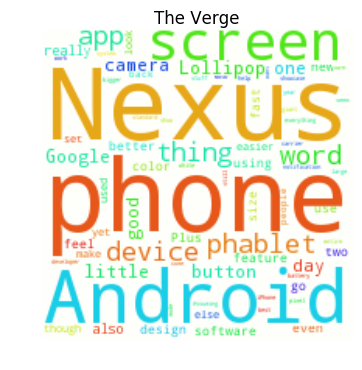

In [96]:
wordcloud_verge = WordCloud(background_color= 'rgb(254,254,250)',
                      width=200,
                      height=200
                     ).generate(n6p_review_clean[0])

plt.imshow(wordcloud_verge)
plt.axis('off')
plt.title("The Verge")
#plt.savefig('./static/nexus-6p-verge.png', dpi=300)
plt.show()

In [62]:
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(wordcloud_tc)
ax1.axis('off')
ax1.set_title("Tech Crunch")
ax2.imshow(wordcloud_verge)
ax2.axis('off')
ax2.set_title("The Verge")
f.show()

In [65]:
f.savefig("./static/n6p-tc-v.png", dpi = 300)

In [27]:
tc = "https://techcrunch.com/2015/10/19/nexus-6p-review-this-is-the-android-device-that-youve-been-waiting-for"

In [28]:
!mkdir ./techcrunch

mkdir: cannot create directory ‘./techcrunch’: File exists


In [31]:
webscrape.read_and_save_url([tc],folder_to_write="./techcrunch")

Currently reading nexus-6p-review-this-is-the-android-device-that-youve-been-waiting-for at https://techcrunch.com/2015/10/19/nexus-6p-review-this-is-the-android-device-that-youve-been-waiting-for


In [30]:
ls ./techcrunch/

nexus-6p-review-this-is-the-android-device-that-youve-been-waiting-for


In [33]:
review_6p_tc = webscrape.read_body_from_url("./techcrunch/nexus-6p-review-this-is-the-android-device-that-youve-been-waiting-for")

In [35]:
review_6p_tc_clean = word_pre_process.clean_text(review_6p_tc)

In [36]:
review_6p_tc_clean

[u'Sundar Pichai made first public presentation Google CEO last month showed slew new hardware devices One two phones announced Nexus P Huawei For flagship Nexus phones bigger necessarily better Let find',
 u'New phones exciting They look new feel new new things everyone loves new I starting feel phone fatigue though I love new technology I feel like incremental updates come along Android phones Apple phones starting get overwhelming It used case device aficionados would pick S version iPhones every year Nexus Not much anymore especially since carriers Apple urging opt plans make sure always new new',
 u'The Nexus P made Huawei one two new flagship Nexus phones In many ways two phones Google answer Apple iPhones While Google gone back making hardware clearly work closely partners',
 u'At Google event last month chatted Jeff Hoefer Google Industrial Design Manager He shed light things designed way especially P They designed purpose purpose shake consumers enough buy one',
 u'The P crown

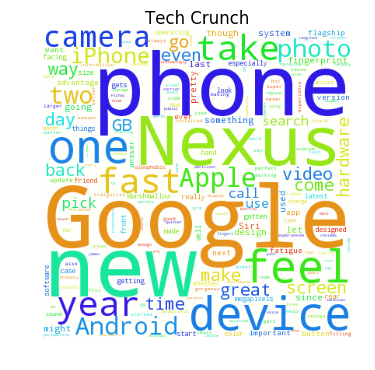

In [49]:
wordcloud_tc = WordCloud(background_color= 'rgb(254,254,250)',
                      width=400,
                      height=400,
                      stopwords = STOPWORDS
                     ).generate(' '.join(review_6p_tc_clean))

plt.imshow(wordcloud_tc)
plt.axis('off')
plt.title("Tech Crunch")
plt.savefig('./static/nexus-6p-tc.png', dpi=300)
plt.show()

In [48]:
ls ./static

100px-The_Verge_Logo_2016.svg.png  nexus-6p-verge.png
nexus-6p-tc.png                    test.png


In [3]:
import pandas as pd

In [7]:
fh = open("./amazon/electronics.json")

In [8]:
for i,line in enumerate(fh):
    print line
    if i == 1:
        break
    

{"reviewerID": "AO94DHGC771SJ", "asin": "0528881469", "reviewerName": "amazdnu", "helpful": [0, 0], "reviewText": "We got this GPS for my husband who is an (OTR) over the road trucker.  Very Impressed with the shipping time, it arrived a few days earlier than expected...  within a week of use however it started freezing up... could of just been a glitch in that unit.  Worked great when it worked!  Will work great for the normal person as well but does have the \"trucker\" option. (the big truck routes - tells you when a scale is coming up ect...)  Love the bigger screen, the ease of use, the ease of putting addresses into memory.  Nothing really bad to say about the unit with the exception of it freezing which is probably one in a million and that's just my luck.  I contacted the seller and within minutes of my email I received a email back with instructions for an exchange! VERY impressed all the way around!", "overall": 5.0, "summary": "Gotta have GPS!", "unixReviewTime": 1370131200,

# Read Amazon Reviews

In [9]:
reviews = pd.read_json("./amazon/electronics.json", orient = "records", lines = True)

MemoryError: 